# 미니 배치와 배치 크기(Mini Batch and Batch Size)

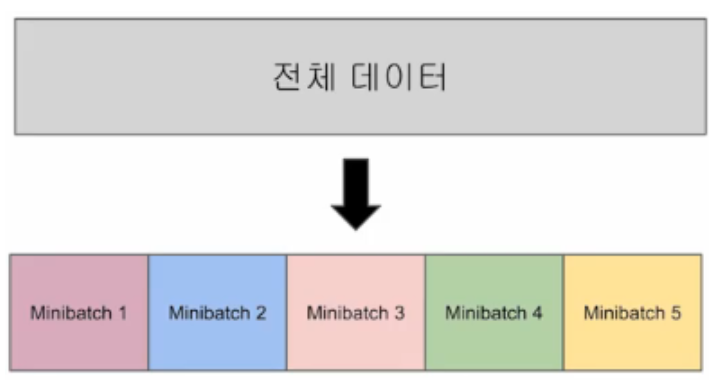

전체 데이터를 하나의 행렬로 선언하여 전체 데이터에 대해서 경사 하강법을 수행하여 학습할 수 있습니다. 만약, 데이터가 수십만개 이상이라면 전체 데이터에 대해서 경사 하강법을 수행하는 것은 매우 느릴 뿐만 아니라 많은 계산량이 필요합니다. 정말 어쩌면 메모리의 한계로 계산이 불가능한 경우도 있을 수 있습니다. 그렇기 때문에 전체 데이터를 더 작은 단위로 나누어서 해당 단위로 학습하는 개념이 나오게 되었습니다.
이 단위를 미니 배치(Mini Batch)라고 합니다. 미니 배치의 개수는 결국 미니 배치의 크기를 몇으로 하느냐에 따라서 달라지는데 미니 배치의 크기를 배치 크기(batch size)라고 합니다. 배치 크기는 보통 2의 제곱수를 사용합니다.   
위의 그림은 전체 데이터를 미니 배치 단위로 나누는 것을 보여줍니다. 미니 배치 학습을 하게되면 미니 배치만큼만 가져가서 미니 배치에 대한 대한 비용(cost)를 계산하고, 경사 하강법을 수행합니다. 그리고 다음 미니 배치를 가져가서 경사 하강법을 수행하고 마지막 미니 배치까지 이를 반복합니다. 이렇게 전체 데이터에 대한 학습이 1회 끝나면 1 에포크(Epoch)가 끝나게 됩니다.

배치 경사 하강법: 전체 데이터에 대해서 한 번에 경사 하강법을 수행  
- 장점: 경사 하강법을 전체 데이터를 사용하므로 가중치 값이 최적값에 수렴하는 과정이 매우 안정적
- 단점: 계산량이 너무 많이 듬  

미니 배치 경사 하강법: 미니 배치 단위로 경사 하강법을 수행  
- 장점: 경사 하강법을 전체 데이터의 일부만을 보고 수행하므로 최적값으로 수렴하는 과정에서 값이 조금 헤맴
- 단점: 훈련 속도가 빠름

# 이터레이션(Iteration)

iteration: 매개변수인 가중치 W와 편향 b의 업데이트 횟수  
iteration = total data / batch size

# 데이터 로드하기(Data Load)

데이터셋(Dataset)과 데이터로더(DataLoader)를 통해 미니 배치 학습, 데이터 셔플(shuffle), 병렬 처리까지 간단히 수행할 수 있습니다. 기본적인 사용 방법은 Dataset을 정의하고, 이를 DataLoader에 전달하는 것입니다.

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F

from torch.utils.data import TensorDataset # 텐서데이터셋
from torch.utils.data import DataLoader # 데이터로더

x_train  =  torch.FloatTensor([[73,  80,  75], 
                               [93,  88,  93], 
                               [89,  91,  90], 
                               [96,  98,  100],   
                               [73,  66,  70]])  
y_train  =  torch.FloatTensor([[152],  [185],  [180],  [196],  [142]])

# 데이터셋을 만들었다면 데이터로더를 사용 가능
dataset = TensorDataset(x_train, y_train) 
dataloader = DataLoader(dataset, batch_size=2, shuffle=True) # 모델이 순서에 익숙해지는 것을 방지하게 위해 shuffle=True 추가

model = nn.Linear(3,1)

optimizer = torch.optim.SGD(model.parameters(), lr=1e-5) 

nb_epochs = 20
for epoch in range(nb_epochs + 1):
  for batch_idx, samples in enumerate(dataloader):
  
    x_train, y_train = samples
    # H(x) 계산
    prediction = model(x_train)

    # cost 계산
    cost = F.mse_loss(prediction, y_train)

    # cost로 H(x) 계산
    optimizer.zero_grad()
    cost.backward()
    optimizer.step()

    print('Epoch {:4d}/{} Batch {}/{} Cost: {:.6f}'.format(
        epoch, nb_epochs, batch_idx+1, len(dataloader),
        cost.item()
        ))

Epoch    0/20 Batch 1/3 Cost: 39748.015625
Epoch    0/20 Batch 2/3 Cost: 12019.021484
Epoch    0/20 Batch 3/3 Cost: 6616.209961
Epoch    1/20 Batch 1/3 Cost: 1045.998535
Epoch    1/20 Batch 2/3 Cost: 178.246796
Epoch    1/20 Batch 3/3 Cost: 132.253860
Epoch    2/20 Batch 1/3 Cost: 18.849213
Epoch    2/20 Batch 2/3 Cost: 11.854869
Epoch    2/20 Batch 3/3 Cost: 0.192208
Epoch    3/20 Batch 1/3 Cost: 2.158379
Epoch    3/20 Batch 2/3 Cost: 0.012528
Epoch    3/20 Batch 3/3 Cost: 1.471659
Epoch    4/20 Batch 1/3 Cost: 0.422744
Epoch    4/20 Batch 2/3 Cost: 0.799088
Epoch    4/20 Batch 3/3 Cost: 0.733838
Epoch    5/20 Batch 1/3 Cost: 0.477178
Epoch    5/20 Batch 2/3 Cost: 0.741836
Epoch    5/20 Batch 3/3 Cost: 1.250666
Epoch    6/20 Batch 1/3 Cost: 1.158939
Epoch    6/20 Batch 2/3 Cost: 0.635725
Epoch    6/20 Batch 3/3 Cost: 0.611711
Epoch    7/20 Batch 1/3 Cost: 0.388713
Epoch    7/20 Batch 2/3 Cost: 1.038971
Epoch    7/20 Batch 3/3 Cost: 1.264424
Epoch    8/20 Batch 1/3 Cost: 1.148783
Epoch

In [2]:
# 임의의 입력 [73, 80, 75]를 선언
new_var =  torch.FloatTensor([[73, 80, 75]]) 
# 입력한 값 [73, 80, 75]에 대해서 예측값 y를 리턴받아서 pred_y에 저장
pred_y = model(new_var) 
print("훈련 후 입력이 73, 80, 75일 때의 예측값 :", pred_y) 

훈련 후 입력이 73, 80, 75일 때의 예측값 : tensor([[152.2278]], grad_fn=<AddmmBackward0>)
